# EJERCICIOS

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
import os
import matplotlib.pyplot as plt
import requests
# import tensorflow_hub as hub
from keras.utils import to_categorical

2025-02-11 16:13:38.326379: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 16:13:38.425372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-11 16:13:38.475624: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-11 16:13:38.476094: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 16:13:38.547788: I tensorflow/core/platform/cpu_feature_gua

## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

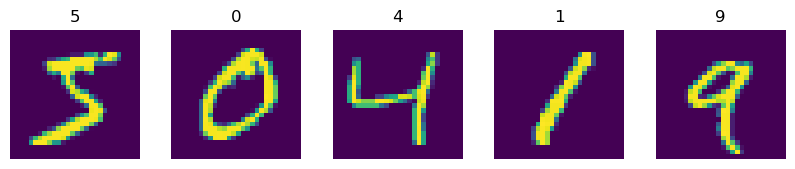

(60000, 10000)

In [56]:
# obtener datos
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# print(x_train.shape)
# normalizar
x_train, x_test = x_train/255.0, x_test/255.0

x_train = x_train.reshape(-1, 28, 28, 1)  # (batch_size, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# ver imagenes
fig,ax = plt.subplots(1,5, figsize=(10,6))
ax = ax.flatten()
for i in range(5):
    ax[i].set_title(y_train[i])
    ax[i].imshow(x_train[i])
    ax[i].axis("off") 
plt.subplots_adjust(wspace=0.25, hspace=0.15)   # ajusta los margenes para separar las imágenes 
plt.show()
len(x_train) , len(x_test)

In [57]:
# crear capas
tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    DefaultConv2D(filters=32),
    DefaultConv2D(filters=32),
    tf.keras.layers.MaxPooling2D(),
    DefaultConv2D(filters=64),
    DefaultConv2D(filters=64),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [58]:
# compilar
model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# entrenar
hist = model.fit(x_train, y_train, epochs=25, validation_split=0.1)   # 10% validacion

Epoch 1/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8382 - loss: 0.5082 - val_accuracy: 0.9848 - val_loss: 0.0509
Epoch 2/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9689 - loss: 0.1063 - val_accuracy: 0.9877 - val_loss: 0.0433
Epoch 3/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9771 - loss: 0.0769 - val_accuracy: 0.9898 - val_loss: 0.0318
Epoch 4/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9821 - loss: 0.0628 - val_accuracy: 0.9908 - val_loss: 0.0361
Epoch 5/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9842 - loss: 0.0571 - val_accuracy: 0.9905 - val_loss: 0.0340
Epoch 6/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9855 - loss: 0.0507 - val_accuracy: 0.9932 - val_loss: 0.0313
Epoch 7/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9868 - loss: 0.0460 - val_accuracy: 0.9922 - val_loss: 0.0302
Epoch 8/25
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9879 - loss: 0.0417 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


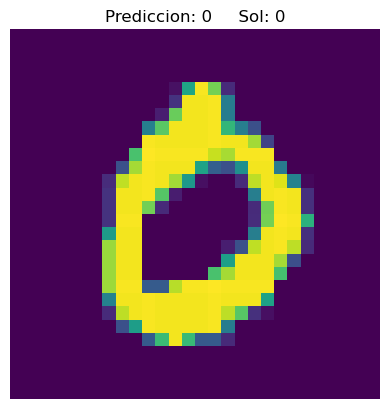

In [ ]:
# predecir
y_pred = model.predict(x_test[3].reshape(1, 28, 28, 1))
plt.imshow(x_test[3])
plt.title('Prediccion: '+str(np.argmax(y_pred))+'      Sol: '+str(y_test[3]))
plt.axis('off')
plt.show()

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

In [13]:
ruta_imgs = 'recursos/imgs/5_3_2/'     # imagenes de clases al azar 
# URL para descargar las clases de ImageNet --> "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"


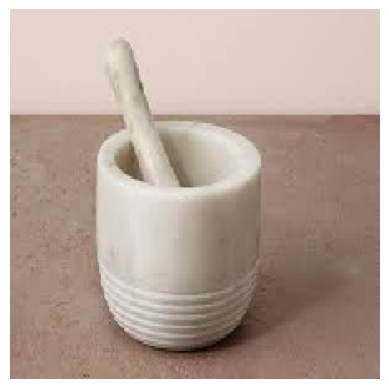

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted: [('n03786901', 'mortar', 0.99999547), ('n07932039', 'eggnog', 6.585926e-07), ('n03775546', 'mixing_bowl', 5.32734e-07)]


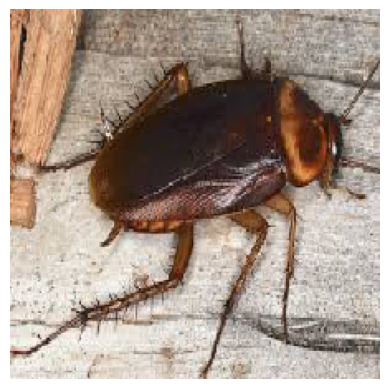

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted: [('n02233338', 'cockroach', 0.9999964), ('n02174001', 'rhinoceros_beetle', 2.4220794e-06), ('n02167151', 'ground_beetle', 7.14353e-07)]


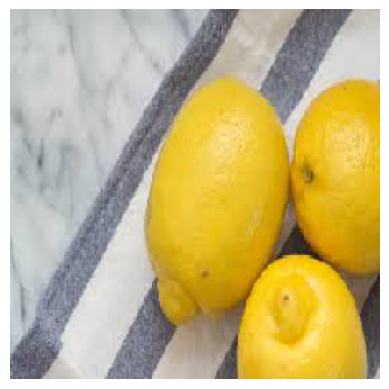

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: [('n07749582', 'lemon', 0.8946522), ('n07716906', 'spaghetti_squash', 0.08380025), ('n07747607', 'orange', 0.016785882)]


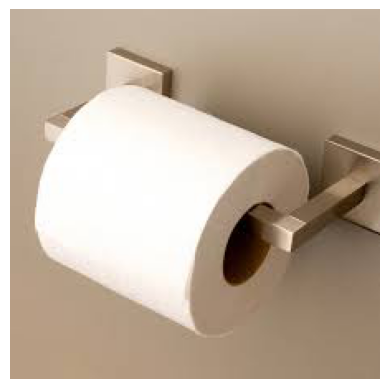

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted: [('n15075141', 'toilet_tissue', 0.9462511), ('n03887697', 'paper_towel', 0.05374889), ('n04049303', 'rain_barrel', 7.411422e-11)]


In [ ]:
# crear modelo
modelo_RN101 = tf.keras.applications.ResNet101V2(
        include_top=True,
        weights="imagenet",
        input_tensor=None,
        input_shape=None,
        pooling=None,
        classes=1000,
        classifier_activation="softmax",
        name="resnet101v2",
    )


# img_path = os.listdir(ruta_imgs)[5] 
for img_path in os.listdir(ruta_imgs)[:4]:
    img = tf.keras.utils.load_img(ruta_imgs+img_path, target_size=(224, 224))   # cargar imagen
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    x = tf.keras.utils.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.resnet_v2.preprocess_input(x)   # procesa la imagen para que sea compatible con el modelo

    preds = modelo_RN101.predict(x)     
    # decode the results into a list of tuples (class, description, probability)    # decode_predictions: descodifica la prediccion
    print('Predicted:', tf.keras.applications.resnet_v2.decode_predictions(preds, top=3)[0])    # top: las tres mejores predicciones


## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

#### Cargar, explorar datos

In [31]:
# Cargar el conjunto de datos Food101 desde TFDS
data, info = tfds.load('food101', split=["validation[:50%]", "validation[50%:]", "train"], with_info=True, as_supervised=True)

# Separar por train, validación y test
x_train = data[2]  # train
x_test = data[0]  # test[:50%]
x_val = data[1]  # test[50%:]
print('train:',len(x_train),'  test:', len(x_val), '  val:', len(x_test))

# Sacar las clases
y_clases = info.features['label'].names
y_clases[::10]

train: 75750   test: 12625   val: 12625


['apple_pie',
 'bruschetta',
 'chicken_wings',
 'deviled_eggs',
 'french_fries',
 'grilled_salmon',
 'lobster_bisque',
 'pad_thai',
 'pulled_pork_sandwich',
 'spaghetti_bolognese',
 'waffles']

In [13]:
# redimensionar y normalizar
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))     # Redimensionar a 224x224
    image = image / 255.0       # Normalizar a [0,1] 
    return image, label

# Aplicar preprocesamiento y batching a cada split
x_train = x_train.map(preprocess).batch(32)    
x_val = x_val.map(preprocess).batch(32)
x_test = x_test.map(preprocess).batch(32)


In [44]:
x_train = x_train.shuffle(100)
len(x_train)

75750

2025-02-11 17:01:47.160411: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


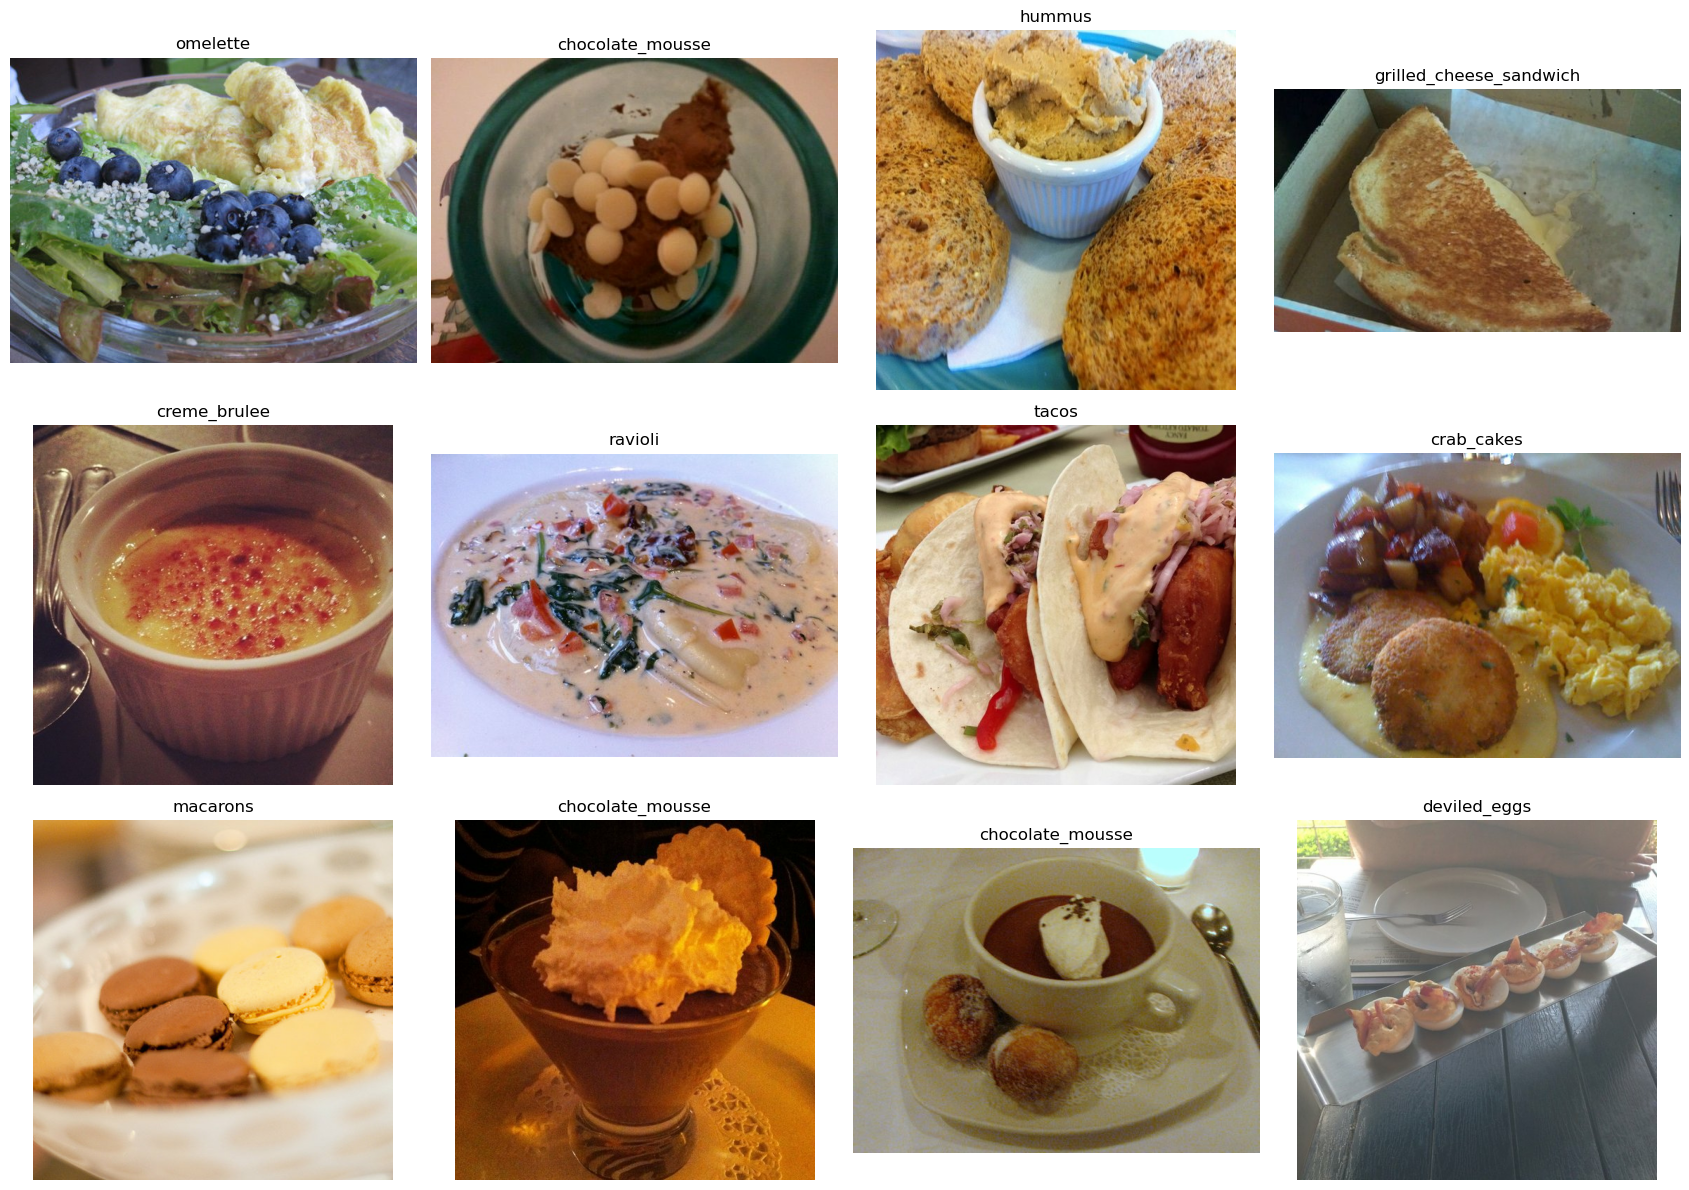

In [45]:
def mostrar_imgs(dataset):     # muestra 10 imgs
    fig,ax = plt.subplots(3,4, figsize=(17,12))
    ax = ax.flatten()
    # aniadimos las imagenes al grafico
    for i, (images, labels) in enumerate(dataset.take(12)):  
        ax[i].set_title(y_clases[labels.numpy()])
        ax[i].imshow(images.numpy())
        ax[i].axis("off")        # quita ejes
    plt.tight_layout()     # ajusta los margenes para separar las imágenes 
    plt.show()
mostrar_imgs(x_train)

#### Modelo

In [ ]:
x_train.shape , x_val.shape

In [46]:
# MobileNetV2 sin capa final
modelMobNet = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
modelMobNet.trainable = False    # congelar las capas 

# aniadir capas globalaveragepooling y densa salida
x = modelMobNet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(101, activation='softmax')(x)  # 101 clases

model = tf.keras.models.Model(inputs=modelMobNet.input, outputs=x)

# compilar y entrenar
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Descongelar y volver a compilar y entrenar
modelMobNet.trainable = True
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(x_train, validation_data=x_val, epochs=10)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


ValueError: Input 0 of layer "functional" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, None, 3)

In [ ]:
# Cargar la imagen
ruta_imgs = 'recursos/imgs/5_3_3/'
imagenes = os.listdir(ruta_imgs)
for ruta_img in imagenes:
    img = tf.keras.preprocessing.image.load_img(ruta_imgs+ruta_img, target_size=(224, 224))  # Redimensionar la imagen
    img_array = tf.keras.preprocessing.image.img_to_array(img)   # convertir a numpy
    img_array = np.expand_dims(img_array, axis=0)  # redimensiona para coincidir con formato (batch_size, height, width, channels)
    img_array = img_array / 255.0  

    # mostrar la imagen 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Predecir
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)   # Obtener la clase con la mayor probabilidad
    labels = info.features['label'].int2str   # pasar indice a etiqueta
    predicted_label = labels(predicted_class[0])  # decodificar la clase en etiqueta

    print('Predicción de clase: ',predicted_label)

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

#### Imagenes

In [47]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import PIL.Image
import time
import functools

# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)


In [48]:
# cargar imagen y limitar dimensión máxima a 512 píxeles.
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

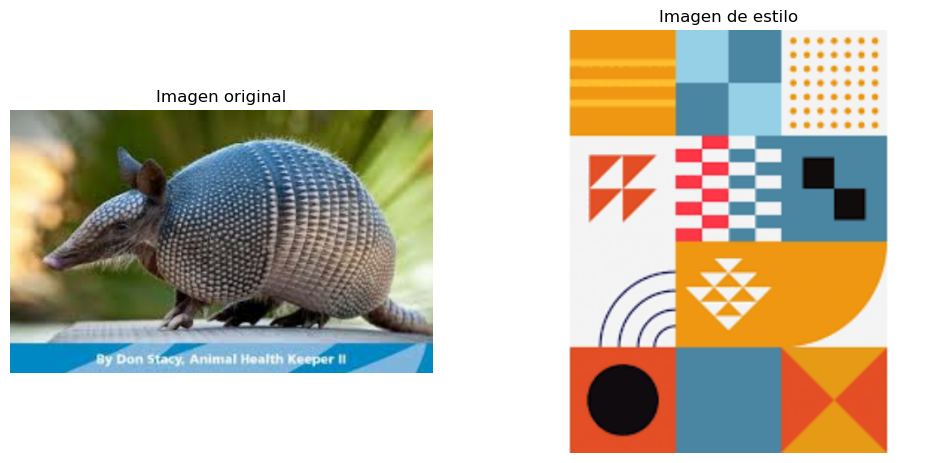

In [49]:
# imagenes
ruta_img_principal = 'recursos/imgs/5_3_5/armadillo.jpeg'
ruta_img_style = 'recursos/imgs/5_3_5/arte_2.png'

def imshow(image, title=None):
    if len(image.shape) > 3: image = tf.squeeze(image, axis=0)
    plt.imshow(image)
    if title: plt.title(title)
    plt.axis('off')

img_principal = load_img(ruta_img_principal)
img_style = load_img(ruta_img_style)

plt.subplot(1, 2, 1)
imshow(img_principal, 'Imagen original')
plt.subplot(1, 2, 2)
imshow(img_style, 'Imagen de estilo')


### Modelo prediccion clase

In [50]:
x = tf.keras.applications.vgg19.preprocess_input(img_principal*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

#### Prediccion 
los 5 más probables

In [51]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('armadillo', 0.9999647),
 ('quail', 8.418542e-06),
 ('mongoose', 7.5760345e-06),
 ('prairie_chicken', 3.2687728e-06),
 ('grey_fox', 3.080178e-06)]

### Modelo fusion de imagenes

In [52]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
for layer in vgg.layers:
  print(layer.name)

input_layer_2
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


#### creacion del modelo

In [53]:
# capas intermedias de la red para representar el estilo y el contenido de la imagen
content_layers = ['block5_conv2'] 
style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']
num_content_layers = len(content_layers)
num_style_layers = len(style_layers)


# crear modelo
def vgg_layers(layer_names):
  """ Creates a vgg model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on imagenet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False

  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(img_style*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())


/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_204']. Received: the structure of inputs=*
  warnings.warn(


block1_conv1
  shape:  (1, 512, 512, 64)
  min:  0.0
  max:  876.1325
  mean:  38.25069
block2_conv1
  shape:  (1, 256, 256, 128)
  min:  0.0
  max:  3870.588
  mean:  188.25244
block3_conv1
  shape:  (1, 128, 128, 256)
  min:  0.0
  max:  11349.785
  mean:  190.95218
block4_conv1
  shape:  (1, 64, 64, 512)
  min:  0.0
  max:  21828.486
  mean:  687.2689
block5_conv1
  shape:  (1, 32, 32, 512)
  min:  0.0
  max:  2561.8079
  mean:  52.726234


#### Fusionar imagenes

In [54]:
# calcular estilo (matriz de gram)
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [55]:
# Extraer estilo y contenido
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}



extractor = StyleContentModel(style_layers, content_layers)
results = extractor(tf.constant(img_principal))
print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_226']. Received: the structure of inputs=*
  warnings.warn(


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.019319365
    max:  18636.535
    mean:  544.4894

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  98852.48
    mean:  13917.618

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  291436.0
    mean:  12702.755

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  2756734.5
    mean:  178525.84

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  76035.13
    mean:  1588.953

Contents:
   block5_conv2
    shape:  (1, 19, 32, 512)
    min:  0.0
    max:  1222.6483
    mean:  15.284991


In [56]:
style_targets = extractor(img_style)['style']
content_targets = extractor(img_principal)['content']

image = tf.Variable(img_principal)   # imagen a optimizar

# mantiene los valores de pixel entre 0y1
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

# optimizador
opt = tf.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)  
style_weight=1e-2
content_weight=1e4

def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

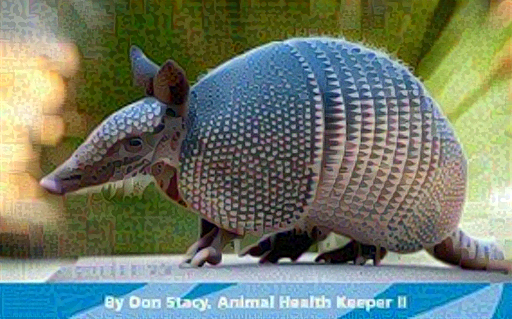

In [57]:
# para actualizar la imagen
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

# prueba
train_step(image)
train_step(image)
train_step(image)
tensor_to_image(image)


In [58]:
###  FUSION 
start = time.time()
epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  # display.clear_output(wait=True)
  # display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

....................................................................................................Train step: 100
....................................................................................................Train step: 200
....................................................................................................Train step: 300
....................................................................................................Train step: 400
....................................................................................................Train step: 500
....................................................................................................Train step: 600
....................................................................................................Train step: 700
....................................................................................................Train step: 800
........................................................................

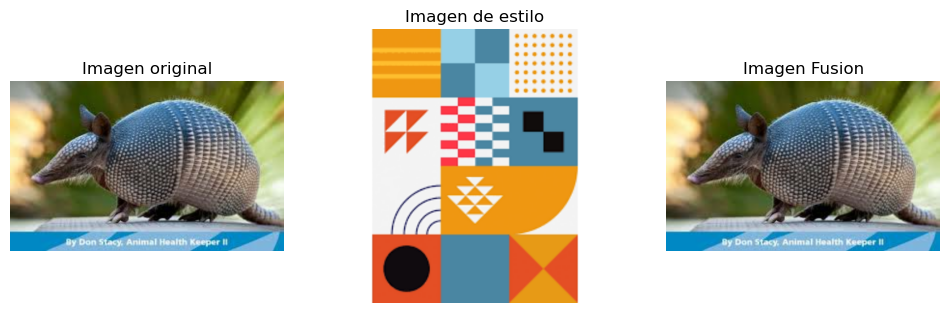

In [70]:
plt.subplot(1, 3, 1)
imshow(img_principal, 'Imagen original')
plt.subplot(1, 3, 2)
imshow(img_style, 'Imagen de estilo')
plt.subplot(1, 3, 3)
imshow(image, 'Imagen Fusion')
img_fusion = image


### Perdida de variacion total
Una desventaja de esta implementación básica es que produce muchos artefactos de alta frecuencia. Disminuya estos utilizando un término de regularización explícito en los componentes de alta frecuencia de la imagen. En la transferencia de estilo, esto a menudo se denomina pérdida de variación total 

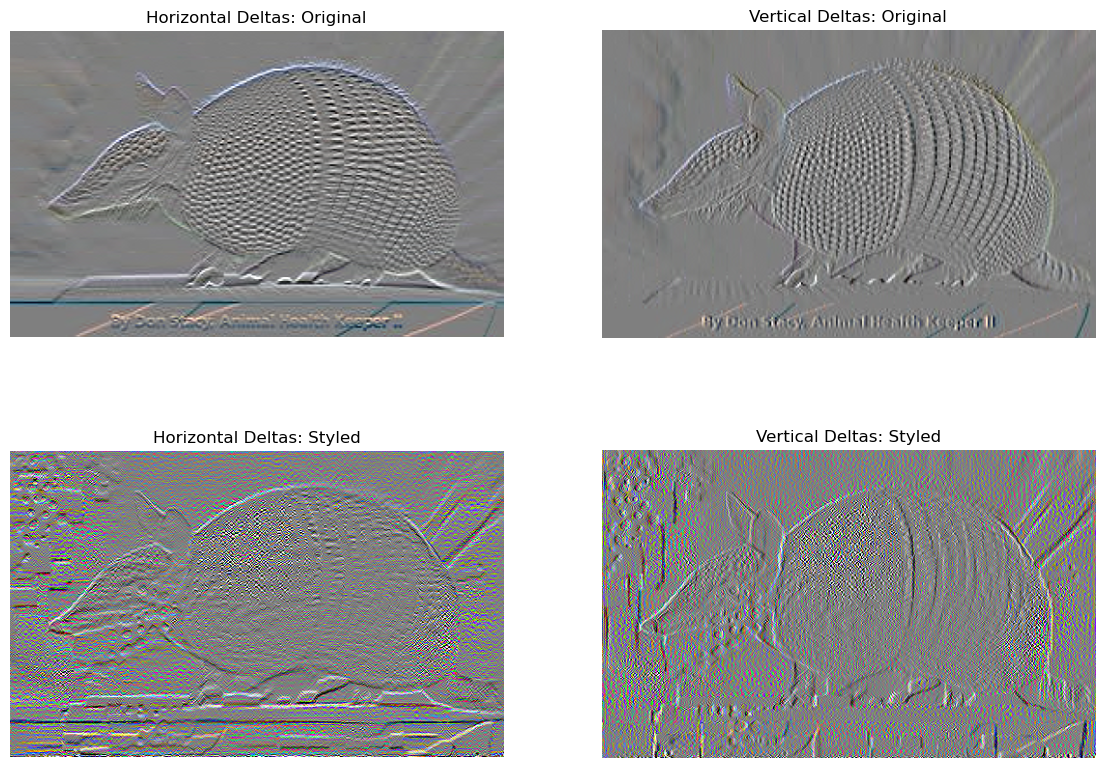

In [60]:
def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var


x_deltas, y_deltas = high_pass_x_y(img_principal)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")


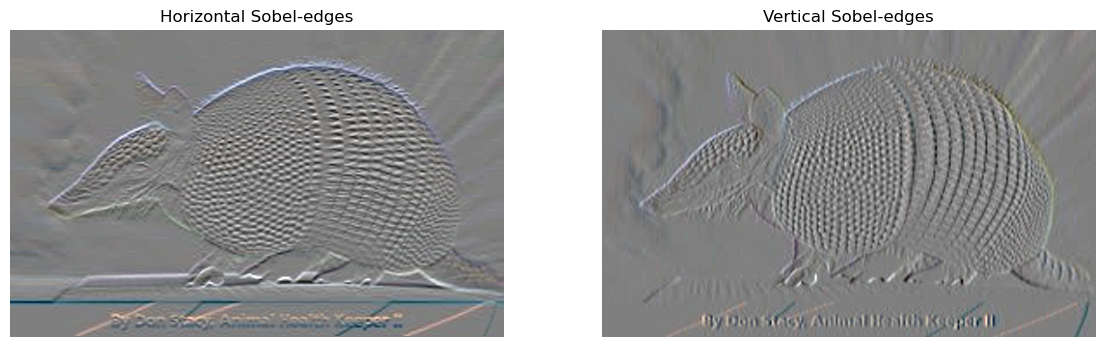

In [61]:
plt.figure(figsize=(14, 10))

sobel = tf.image.sobel_edges(img_principal)
plt.subplot(1, 2, 1)
imshow(clip_0_1(sobel[..., 0]/4+0.5), "Horizontal Sobel-edges")
plt.subplot(1, 2, 2)
imshow(clip_0_1(sobel[..., 1]/4+0.5), "Vertical Sobel-edges")


In [62]:
# def total_variation_loss(image):
#   x_deltas, y_deltas = high_pass_x_y(image)
#   return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))
# total_variation_loss(image).numpy()

tf.image.total_variation(image).numpy()    # funcion de tensorflow para lo comentado arriba

array([95340.84], dtype=float32)

### Repetir optimizacion

In [63]:
total_variation_weight=30

@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    # loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

image = tf.Variable(img_principal)

start = time.time()
epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
#   display.clear_output(wait=True)
#   display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

tensor_to_image(image)

/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_226']. Received: the structure of inputs=*
  warnings.warn(


ValueError: in user code:

    File "/tmp/ipykernel_15325/4060573154.py", line 11, in train_step  *
        opt.apply_gradients([(grad, image)])
    File "/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 344, in apply_gradients  **
        self.apply(grads, trainable_variables)
    File "/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 385, in apply
        self._check_variables_are_known(trainable_variables)
    File "/home/iabd/anaconda3/envs/IABD3_12/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py", line 290, in _check_variables_are_known
        raise ValueError(

    ValueError: Unknown variable: <tf.Variable 'Variable:0' shape=(1, 319, 512, 3) dtype=float32>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.


## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)